In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

import warnings
warnings.filterwarnings("ignore")

### Naive Bayes

In [166]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from datetime import timedelta

datetime_date = np.datetime64('2022-06')
print (datetime_date)
present_month = str(datetime_date)
final_month = '2024-03'

2022-06


In [167]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB 
from sklearn.naive_bayes import CategoricalNB

prediction = pd.DataFrame(columns=['post_time', 'gnb_avg', 'mnb_avg', 'cnb_avg', 'bnb_avg', 'catnb_avg', 'true_label'])

while present_month != final_month:
# for i in range(100):
    print(present_month)
    yuanta_data_train = pd.read_csv('./new data/'+ present_month + '/train.csv')
    yuanta_data_test = pd.read_csv('./new data/'+ present_month + '/test.csv')
    yuanta_data_train = yuanta_data_train[yuanta_data_train['label'] != 0]
    yuanta_data_test = yuanta_data_test[yuanta_data_test['label'] != 0]
    Y_train= yuanta_data_train['label']
    X_train = yuanta_data_train.drop('label', axis=1)
    X_train = X_train.drop('post_time', axis=1)
    print("----------------------------------")

    gnb = GaussianNB()
    gnb.fit(X_train, Y_train)

    mnb = MultinomialNB()
    mnb.fit(X_train, Y_train)

    cnb = ComplementNB()
    cnb.fit(X_train, Y_train)

    bnb = BernoulliNB()
    bnb.fit(X_train, Y_train)

    catnb = CategoricalNB(min_categories=3)
    catnb.fit(X_train, Y_train)
    
    test_strDate = str(datetime_date) + '-01'
    test_datetime = np.datetime64(test_strDate)
    test_endDate = str(datetime_date + np.timedelta64(1, 'M')) + '-01'
    print(test_strDate, test_endDate)
    while test_strDate != test_endDate:
        singleDay_X = yuanta_data_test[yuanta_data_test['post_time'] == test_strDate]
        singleDay_X.drop('label', axis=1, inplace=True)
        singleDay_X.drop('post_time', axis=1, inplace=True)
        singleDay_Y = yuanta_data_test[yuanta_data_test['post_time'] == test_strDate]['label']
        
        if len(singleDay_X) == 0:
            test_datetime += np.timedelta64(1, 'D')
            test_strDate = str(test_datetime)
            continue
            
        gnb_y_pred = gnb.predict(singleDay_X)
        mnb_y_pred = mnb.predict(singleDay_X)
        cnb_y_pred = cnb.predict(singleDay_X)
        bnb_y_pred = bnb.predict(singleDay_X)
        catnb_y_pred = catnb.predict(singleDay_X)

        gnb_avg = gnb_y_pred.mean()
        mnb_avg = mnb_y_pred.mean()
        cnb_avg = cnb_y_pred.mean()
        bnb_avg = bnb_y_pred.mean()
        catnb_avg = catnb_y_pred.mean()

        prediction = pd.concat([prediction, pd.DataFrame([[test_strDate, gnb_avg, mnb_avg, cnb_avg, bnb_avg, catnb_avg, int(singleDay_Y.mean())]], columns=['post_time', 'gnb_avg', 'mnb_avg', 'cnb_avg', 'bnb_avg', 'catnb_avg', 'true_label'])], ignore_index=True)

        print(test_strDate)
        test_datetime += np.timedelta64(1, 'D')
        test_strDate = str(test_datetime)

    datetime_date += np.timedelta64(1, 'M')
    present_month = str(datetime_date)

2022-06
----------------------------------
2022-06-01 2022-07-01
2022-06-01
2022-06-02
2022-06-03
2022-06-04
2022-06-05
2022-06-08
2022-06-10
2022-06-11
2022-06-15
2022-06-17
2022-06-18
2022-06-19
2022-06-22
2022-06-23
2022-06-25
2022-06-26
2022-06-29
2022-06-30
2022-07
----------------------------------
2022-07-01 2022-08-01
2022-07-01
2022-07-02
2022-07-03
2022-07-06
2022-07-07
2022-07-08
2022-07-09
2022-07-10
2022-07-13
2022-07-14
2022-07-15
2022-07-16
2022-07-20
2022-07-21
2022-07-24
2022-07-27
2022-07-29
2022-07-31
2022-08
----------------------------------
2022-08-01 2022-09-01
2022-08-03
2022-08-05
2022-08-10
2022-08-11
2022-08-12
2022-08-13
2022-08-18
2022-08-20
2022-08-21
2022-08-25
2022-08-26
2022-08-27
2022-08-31
2022-09
----------------------------------
2022-09-01 2022-10-01
2022-09-01
2022-09-02
2022-09-07
2022-09-08
2022-09-09
2022-09-10
2022-09-11
2022-09-14
2022-09-16
2022-09-17
2022-09-18
2022-09-21
2022-09-22
2022-09-23
2022-09-24
2022-09-28
2022-09-30
2022-10
------

In [168]:
prediction

,post_time,gnb_avg,mnb_avg,cnb_avg,bnb_avg,catnb_avg,true_label
0,2022-06-01,0.000000,0.750000,0.125000,1.000000,1.0,1
1,2022-06-02,-0.826087,0.565217,-0.565217,0.652174,1.0,-1
2,2022-06-03,0.000000,0.000000,0.000000,0.000000,1.0,-1
3,2022-06-04,-1.000000,1.000000,0.333333,1.000000,1.0,1
4,2022-06-05,-1.000000,0.714286,0.142857,0.714286,1.0,-1
...,...,...,...,...,...,...,...
272,2024-01-31,0.000000,0.750000,0.750000,1.000000,1.0,-1
273,2024-02-11,0.333333,1.000000,1.000000,1.000000,1.0,1
274,2024-02-14,0.090909,1.000000,0.636364,1.000000,1.0,1
275,2024-02-15,-0.085714,0.942857,0.657143,1.000000,1.0,1


In [169]:
import matplotlib.pyplot as plt

rate_gnb = {'Active':[], 'Accuracy':[], 'threshold':[], 'true_active':[], 'true_acc':[],}
rate_mnb = {'Active':[], 'Accuracy':[], 'threshold':[],  'true_active':[], 'true_acc':[],}
rate_cnb = {'Active':[], 'Accuracy':[], 'threshold':[],  'true_active':[], 'true_acc':[],}
rate_bnb = {'Active':[], 'Accuracy':[], 'threshold':[],  'true_active':[], 'true_acc':[],}
rate_catnb = {'Active':[], 'Accuracy':[], 'threshold':[],  'true_active':[], 'true_acc':[],}
rate_gnc = {'Active':[], 'Accuracy':[], 'threshold':[],  'true_active':[], 'true_acc':[],}
rate_all = {'Active':[], 'Accuracy':[], 'threshold':[],  'true_active':[], 'true_acc':[],}
rate_posg_negc = {'Active':[], 'Accuracy':[], 'threshold':[],  'true_active':[], 'true_acc':[],}

all_calculate = []

for i in range(1,100):
    
    calculate = pd.DataFrame(columns=['post_time', 'threshold', 'gnb_pred', 'mnb_pred', 'cnb_pred', 'bnb_pred', 'catnb_pred', 'g+c_pred', 'all_pred', 'posg_negc_pred', 'true_label'])
    temp = pd.DataFrame(columns=['gnb_pos', 'gnb_neg'])
    temp['gnb_pos'] = prediction['gnb_avg'].apply(lambda x: 1 if x > 0 and x > i/100 else 0)
    temp['gnb_neg'] = prediction['gnb_avg'].apply(lambda x: -1 if x < 0and x < -(i/100) else 0)
    calculate['gnb_pred'] = temp[['gnb_pos', 'gnb_neg']].apply(lambda x: 1 if x['gnb_pos'] != 0 else x['gnb_neg'], axis=1)
    
    temp = pd.DataFrame(columns=['mnb_pos', 'mnb_neg'])
    temp['mnb_pos'] = prediction['mnb_avg'].apply(lambda x: 1 if x > 0 and x > i/100 else 0)
    temp['mnb_neg'] = prediction['mnb_avg'].apply(lambda x: -1 if x < 0and x < -(i/100) else 0)
    calculate['mnb_pred'] = temp[['mnb_pos', 'mnb_neg']].apply(lambda x: 1 if x['mnb_pos'] != 0 else x['mnb_neg'], axis=1)
    
    temp = pd.DataFrame(columns=['cnb_pos', 'cnb_neg'])
    temp['cnb_pos'] = prediction['cnb_avg'].apply(lambda x: 1 if x > 0 and x > i/100 else 0)
    temp['cnb_neg'] = prediction['cnb_avg'].apply(lambda x: -1 if x < 0and x < -(i/100) else 0)
    calculate['cnb_pred'] = temp[['cnb_pos', 'cnb_neg']].apply(lambda x: 1 if x['cnb_pos'] != 0 else x['cnb_neg'], axis=1)
    
    temp = pd.DataFrame(columns=['bnb_pos', 'bnb_neg'])
    temp['bnb_pos'] = prediction['bnb_avg'].apply(lambda x: 1 if x > 0 and x > i/100 else 0)
    temp['bnb_neg'] = prediction['bnb_avg'].apply(lambda x: -1 if x < 0and x < -(i/100) else 0)
    calculate['bnb_pred'] = temp[['bnb_pos', 'bnb_neg']].apply(lambda x: 1 if x['bnb_pos'] != 0 else x['bnb_neg'], axis=1)
    
    temp = pd.DataFrame(columns=['catnb_pos', 'catnb_neg'])
    temp['catnb_pos'] = prediction['catnb_avg'].apply(lambda x: 1 if x > 0 and x > i/100 else 0)
    temp['catnb_neg'] = prediction['catnb_avg'].apply(lambda x: -1 if x < 0and x < -(i/100) else 0)
    calculate['catnb_pred'] = temp[['catnb_pos', 'catnb_neg']].apply(lambda x: 1 if x['catnb_pos'] != 0 else x['catnb_neg'], axis=1)
    
    temp = pd.DataFrame(columns=['g+c_avg','g+c_pos', 'g+c_neg'])
    temp['g+c_avg'] = (prediction['gnb_avg'] + prediction['cnb_avg'])/2
    temp['g+c_pos'] = temp['g+c_avg'].apply(lambda x: 1 if x > 0 and x > i/100 else 0)
    temp['g+c_neg'] = temp['g+c_avg'].apply(lambda x: -1 if x < 0and x < -(i/100) else 0)
    calculate['g+c_pred'] = temp[['g+c_pos', 'g+c_neg']].apply(lambda x: 1 if x['g+c_pos'] != 0 else x['g+c_neg'], axis=1)
    
    temp = pd.DataFrame(columns=['all_avg','all_pos', 'all_neg'])
    temp['all_avg'] = (prediction['gnb_avg'] + prediction['cnb_avg'] + prediction['mnb_avg'] + prediction['bnb_avg'] + prediction['catnb_avg'])/5
    temp['all_pos'] = temp['all_avg'].apply(lambda x: 1 if x > 0 and x > i/100 else 0)
    temp['all_neg'] = temp['all_avg'].apply(lambda x: -1 if x < 0and x < -(i/100) else 0)
    calculate['all_pred'] = temp[['all_pos', 'all_neg']].apply(lambda x: 1 if x['all_pos'] != 0 else x['all_neg'], axis=1)
    
    calculate['posg_negc_pred'] = calculate[['gnb_pred', 'g+c_pred']].apply(lambda x: -1 if x['g+c_pred'] < 0 else x['gnb_pred'], axis=1)
    
    calculate['post_time'] = prediction['post_time']
    calculate['threshold'] = i/100
    calculate['true_label'] = prediction['true_label']
    
    all_calculate.append(calculate)
    
    print(calculate)
    col = ['gnb_pred', 'mnb_pred', 'cnb_pred', 'bnb_pred', 'catnb_pred', 'g+c_pred', 'all_pred', 'posg_negc_pred']
    if list(calculate['true_label']).count(0) != 0:
        true_active = 1 - (list(calculate['true_label']).count(0) / len(calculate['true_label']))
    else:
        true_active = 1
    true_acc = accuracy_score(list(calculate['true_label']), list(calculate['true_label']))
    true_f1 = 2 * true_active * true_acc / (true_active + true_acc)
                              
    for j in range(8):
        
        if list(calculate[col[j]]).count(0) != 0:
            active = 1 - (list(calculate[col[j]]).count(0) / len(calculate[col[j]]))
        else:
            active = 1
        acc = accuracy_score(list(calculate['true_label']), list(calculate[col[j]]))
        f1 = 2 * active * acc / (active + acc)
        
        
        if j == 0:
            rate_gnb['Active'].append(active)
            rate_gnb['Accuracy'].append(acc)
            rate_gnb['threshold'].append(calculate['threshold'].iloc[0])
            rate_gnb['true_active'].append(true_active)
            rate_gnb['true_acc'].append(true_acc)
        elif j == 1:
            rate_mnb['Active'].append(active)
            rate_mnb['Accuracy'].append(acc)
            rate_mnb['threshold'].append(calculate['threshold'].iloc[0])
            rate_mnb['true_active'].append(true_active)
            rate_mnb['true_acc'].append(true_acc)
        elif j == 2:
            rate_cnb['Active'].append(active)
            rate_cnb['Accuracy'].append(acc)
            rate_cnb['threshold'].append(calculate['threshold'].iloc[0])
            rate_cnb['true_active'].append(true_active)
            rate_cnb['true_acc'].append(true_acc)
        elif j == 3:
            rate_bnb['Active'].append(active)
            rate_bnb['Accuracy'].append(acc)
            rate_bnb['threshold'].append(calculate['threshold'].iloc[0])
            rate_bnb['true_active'].append(true_active)
            rate_bnb['true_acc'].append(true_acc)
        elif j == 4:
            rate_catnb['Active'].append(active)
            rate_catnb['Accuracy'].append(acc)
            rate_catnb['threshold'].append(calculate['threshold'].iloc[0])
            rate_catnb['true_active'].append(true_active)
            rate_catnb['true_acc'].append(true_acc)
        elif j == 5:
            rate_gnc['Active'].append(active)
            rate_gnc['Accuracy'].append(acc)
            rate_gnc['threshold'].append(calculate['threshold'].iloc[0])
            rate_gnc['true_active'].append(true_active)
            rate_gnc['true_acc'].append(true_acc)
        elif j == 6:
            rate_all['Active'].append(active)
            rate_all['Accuracy'].append(acc)
            rate_all['threshold'].append(calculate['threshold'].iloc[0])
            rate_all['true_active'].append(true_active)
            rate_all['true_acc'].append(true_acc)
        else:
            rate_posg_negc['Active'].append(active)
            rate_posg_negc['Accuracy'].append(acc)
            rate_posg_negc['threshold'].append(calculate['threshold'].iloc[0])
            rate_posg_negc['true_active'].append(true_active)
            rate_posg_negc['true_acc'].append(true_acc)

      post_time  threshold  gnb_pred  mnb_pred  cnb_pred  bnb_pred  \
0    2022-06-01       0.01         0         1         1         1   
1    2022-06-02       0.01        -1         1        -1         1   
2    2022-06-03       0.01         0         0         0         0   
3    2022-06-04       0.01        -1         1         1         1   
4    2022-06-05       0.01        -1         1         1         1   
..          ...        ...       ...       ...       ...       ...   
272  2024-01-31       0.01         0         1         1         1   
273  2024-02-11       0.01         1         1         1         1   
274  2024-02-14       0.01         1         1         1         1   
275  2024-02-15       0.01        -1         1         1         1   
276  2024-02-16       0.01        -1         1         1         1   

     catnb_pred  g+c_pred  all_pred  posg_negc_pred true_label  
0             1         1         1               0          1  
1             1        -1    

GaussianNB 0.01
Active: 0.9530685920577617
Accuracy: 0.5090252707581228
[[54  4 75]
 [ 0  0  0]
 [48  9 87]]
Accuracy(non-0): 0.5340909090909091


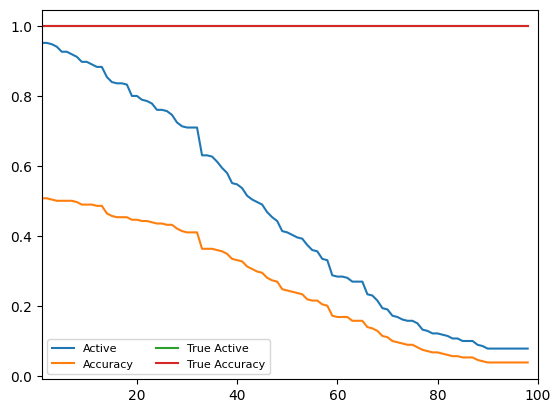

In [172]:
from sklearn.metrics import confusion_matrix
threshold = rate_gnb['threshold'][rate_gnb['Accuracy'].index(max(rate_gnb['Accuracy']))]
print('GaussianNB', threshold)
print('Active:', rate_gnb['Active'][rate_gnb['Accuracy'].index(max(rate_gnb['Accuracy']))])
print('Accuracy:', rate_gnb['Accuracy'][rate_gnb['Accuracy'].index(max(rate_gnb['Accuracy']))])
temp = all_calculate[int(threshold*100-1)]
cf = confusion_matrix(list(temp['true_label']), list(temp['gnb_pred']))
print(cf)
print("Accuracy(non-0):", (cf[0][0] + cf[2][2]) / (cf[0][0] + cf[0][2] + cf[2][0] + cf[2][2]))

plt.plot(rate_gnb['Active'], label='Active')
plt.plot(rate_gnb['Accuracy'], label='Accuracy')
plt.plot(rate_gnb['true_active'], label='True Active')
plt.plot(rate_gnb['true_acc'], label='True Accuracy')
plt.xlim(1, 100)
plt.legend(
    loc='best',
    ncol=2,
    fontsize=8
)

MultinomialNB 0.01
Active: 0.9530685920577617
Accuracy: 0.4729241877256318
[[71  6 56]
 [ 0  0  0]
 [77  7 60]]
Accuracy(non-0): 0.4962121212121212


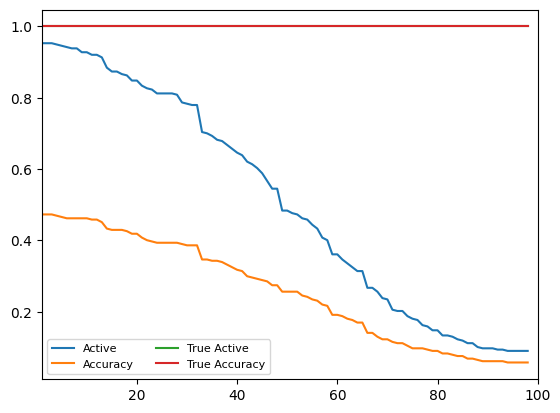

In [173]:
threshold = rate_mnb['threshold'][rate_mnb['Accuracy'].index(max(rate_mnb['Accuracy']))]
print('MultinomialNB', threshold)
print('Active:', rate_mnb['Active'][rate_mnb['Accuracy'].index(max(rate_mnb['Accuracy']))])
print('Accuracy:', rate_mnb['Accuracy'][rate_mnb['Accuracy'].index(max(rate_mnb['Accuracy']))])
temp = all_calculate[int(threshold*100-1)]
cf = confusion_matrix(list(temp['true_label']), list(temp['mnb_pred']))
print(cf)   
print("Accuracy(non-0):", (cf[0][0] + cf[2][2]) / (cf[0][0] + cf[0][2] + cf[2][0] + cf[2][2]))

plt.plot(rate_mnb['Active'], label='Active')
plt.plot(rate_mnb['Accuracy'], label='Accuracy')
plt.plot(rate_mnb['true_active'], label='True Active')
plt.plot(rate_mnb['true_acc'], label='True Accuracy')
plt.xlim(1, 100)
plt.legend(
    loc='best',
    ncol=2,
    fontsize=8
)

ComplementNB 0.01
Active: 0.9422382671480144
Accuracy: 0.48014440433212996
[[101   7  25]
 [  0   0   0]
 [103   9  32]]
Accuracy(non-0): 0.5095785440613027


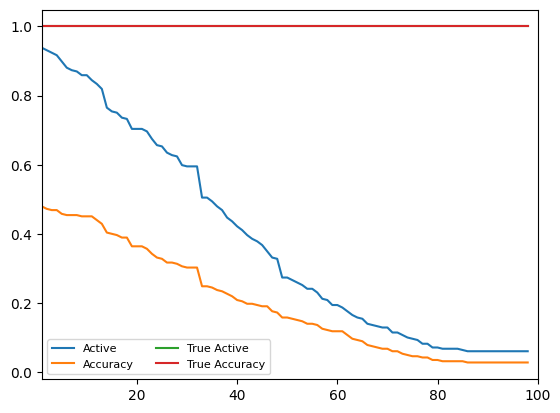

In [174]:
threshold = rate_cnb['threshold'][rate_cnb['Accuracy'].index(max(rate_cnb['Accuracy']))]
print('ComplementNB', threshold)
print('Active:', rate_cnb['Active'][rate_cnb['Accuracy'].index(max(rate_cnb['Accuracy']))])
print('Accuracy:', rate_cnb['Accuracy'][rate_cnb['Accuracy'].index(max(rate_cnb['Accuracy']))])
temp = all_calculate[int(threshold*100-1)]
cf = confusion_matrix(list(temp['true_label']), list(temp['cnb_pred']))
print(cf)
print("Accuracy(non-0):", (cf[0][0] + cf[2][2]) / (cf[0][0] + cf[0][2] + cf[2][0] + cf[2][2]))

plt.plot(rate_cnb['Active'], label='Active')
plt.plot(rate_cnb['Accuracy'], label='Accuracy')
plt.plot(rate_cnb['true_active'], label='True Active')
plt.plot(rate_cnb['true_acc'], label='True Accuracy')
plt.xlim(1, 100)
plt.legend(
    loc='best',
    ncol=2,
    fontsize=8
)

BernoulliNB 0.01
Active: 0.9927797833935018
Accuracy: 0.4693140794223827
[[78  1 54]
 [ 0  0  0]
 [91  1 52]]
Accuracy(non-0): 0.4727272727272727


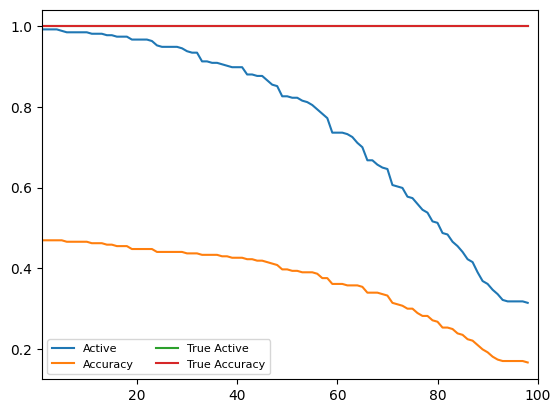

In [175]:
threshold = rate_bnb['threshold'][rate_bnb['Accuracy'].index(max(rate_bnb['Accuracy']))]
print('BernoulliNB', threshold)
print('Active:', rate_bnb['Active'][rate_bnb['Accuracy'].index(max(rate_bnb['Accuracy']))])
print('Accuracy:', rate_bnb['Accuracy'][rate_bnb['Accuracy'].index(max(rate_bnb['Accuracy']))])
temp = all_calculate[int(threshold*100-1)]
cf = confusion_matrix(list(temp['true_label']), list(temp['bnb_pred']))
print(cf)
print("Accuracy(non-0):", (cf[0][0] + cf[2][2]) / (cf[0][0] + cf[0][2] + cf[2][0] + cf[2][2]))

plt.plot(rate_bnb['Active'], label='Active')
plt.plot(rate_bnb['Accuracy'], label='Accuracy')
plt.plot(rate_bnb['true_active'], label='True Active')
plt.plot(rate_bnb['true_acc'], label='True Accuracy')
plt.xlim(1, 100)
plt.legend(
    loc='best',
    ncol=2,
    fontsize=8
)

GaussianNB + ComplementNB 0.01
Active: 0.8880866425992779
Accuracy: 0.51985559566787
[[73 10 61]
 [ 0  0  0]
 [41 21 71]]
Accuracy(non-0): 0.5853658536585366


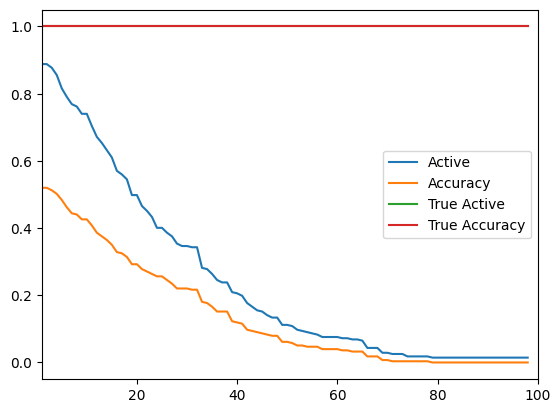

In [179]:
threshold = rate_gnc['threshold'][rate_gnc['Accuracy'].index(max(rate_gnc['Accuracy']))]
print('GaussianNB + ComplementNB', threshold)
print('Active:', rate_gnc['Active'][rate_gnc['Accuracy'].index(max(rate_gnc['Accuracy']))])
print('Accuracy:', rate_gnc['Accuracy'][rate_gnc['Accuracy'].index(max(rate_gnc['Accuracy']))])
temp = all_calculate[int(threshold*100-1)]
cf = confusion_matrix(list(temp['true_label']), list(temp['g+c_pred']), labels=[1,0,-1])
print(cf)
print("Accuracy(non-0):", (cf[0][0] + cf[2][2]) / (cf[0][0] + cf[0][2] + cf[2][0] + cf[2][2]))

plt.plot(rate_gnc['Active'], label='Active')
plt.plot(rate_gnc['Accuracy'], label='Accuracy')
plt.plot(rate_gnc['true_active'], label='True Active')
plt.plot(rate_gnc['true_acc'], label='True Accuracy')
plt.xlim(1, 100)
plt.legend()

All 0.01
Active: 0.9891696750902527
Accuracy: 0.48014440433212996
[[76  1 56]
 [ 0  0  0]
 [85  2 57]]
Accuracy(non-0): 0.4854014598540146


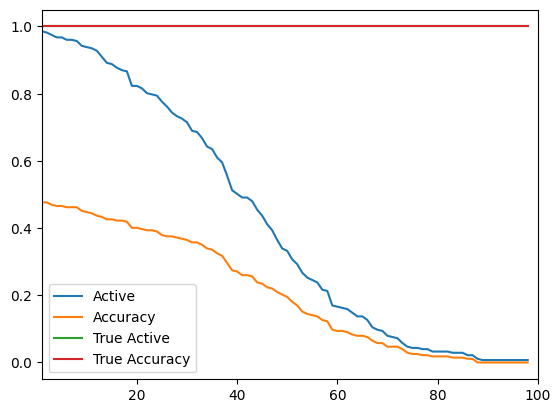

In [177]:
# Highest Active
threshold = rate_all['threshold'][rate_all['Accuracy'].index(max(rate_all['Accuracy']))]
print('All', rate_all['threshold'][rate_all['Accuracy'].index(max(rate_all['Accuracy']))])
print('Active:', rate_all['Active'][rate_all['Accuracy'].index(max(rate_all['Accuracy']))])
print('Accuracy:', rate_all['Accuracy'][rate_all['Accuracy'].index(max(rate_all['Accuracy']))])
temp = all_calculate[int(threshold*100-1)]
cf = confusion_matrix(list(temp['true_label']), list(temp['all_pred']))
print(cf)
print("Accuracy(non-0):", (cf[0][0] + cf[2][2]) / (cf[0][0] + cf[0][2] + cf[2][0] + cf[2][2]))

plt.plot(rate_all['Active'], label='Active')
plt.plot(rate_all['Accuracy'], label='Accuracy')
plt.plot(rate_all['true_active'], label='True Active')
plt.plot(rate_all['true_acc'], label='True Accuracy')
plt.xlim(1, 100)
plt.legend()

Positive GaussianNB + Negative ComplementNB 0.04
Active: 0.9783393501805054
Accuracy: 0.5523465703971119
[[78  3 52]
 [ 0  0  0]
 [66  3 75]]
Accuracy(non-0): 0.5645756457564576


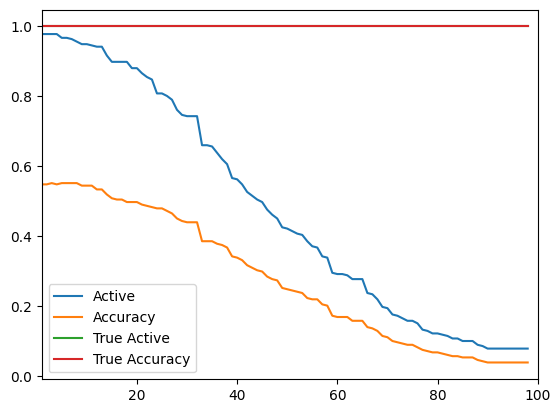

In [178]:
threshold = rate_posg_negc['threshold'][rate_posg_negc['Accuracy'].index(max(rate_posg_negc['Accuracy']))]
print('Positive GaussianNB + Negative ComplementNB', threshold)
print('Active:', rate_posg_negc['Active'][rate_posg_negc['Accuracy'].index(max(rate_posg_negc['Accuracy']))])
print('Accuracy:', rate_posg_negc['Accuracy'][rate_posg_negc['Accuracy'].index(max(rate_posg_negc['Accuracy']))])
temp = all_calculate[int(threshold*100-1)]
cf = confusion_matrix(list(temp['true_label']), list(temp['posg_negc_pred']))
print(cf)
print("Accuracy(non-0):", (cf[0][0] + cf[2][2]) / (cf[0][0] + cf[0][2] + cf[2][0] + cf[2][2]))

plt.plot(rate_posg_negc['Active'], label='Active')
plt.plot(rate_posg_negc['Accuracy'], label='Accuracy')
plt.plot(rate_posg_negc['true_active'], label='True Active')
plt.plot(rate_posg_negc['true_acc'], label='True Accuracy')
plt.xlim(1, 100)
plt.legend()